In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import ipywidgets as widgets
%matplotlib widget

interactive(children=(IntSlider(value=5, continuous_update=False, description='num_rows', max=10, min=1), IntS…

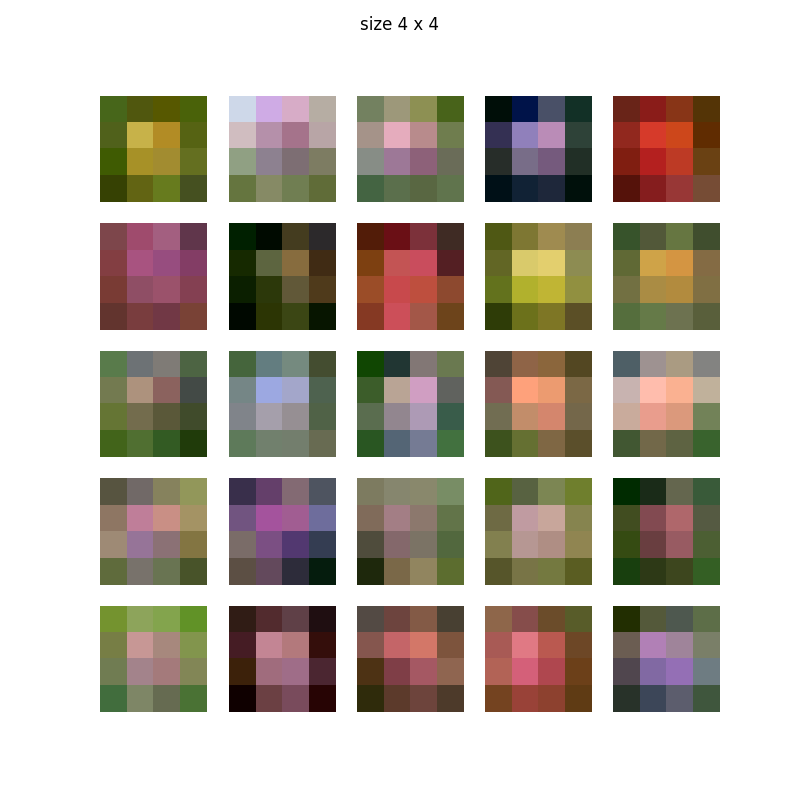

In [43]:
fig = plt.figure(figsize=(8,8))
@widgets.interact(
            step=widgets.IntSlider(
                min=0, max=8, step=1,
                value=0,
                continuous_update=False,
            ),
            num_rows=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
            num_cols=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
)
def show(num_rows = 10, num_cols = 10, step=0):
    fig.clear()
    fig.suptitle(f'size {4*2**(step)} x {4*2**(step)}')
    for i, img_file in enumerate(glob(f'saved_examples/step{step}/*.png')[:num_rows*num_cols]):
        fig.add_subplot(num_rows, num_cols, i+1)
        img = mpimg.imread(img_file)
        plt.imshow(img)
        plt.axis('off')

interactive(children=(IntSlider(value=5, continuous_update=False, description='num_rows', max=10, min=1), IntS…

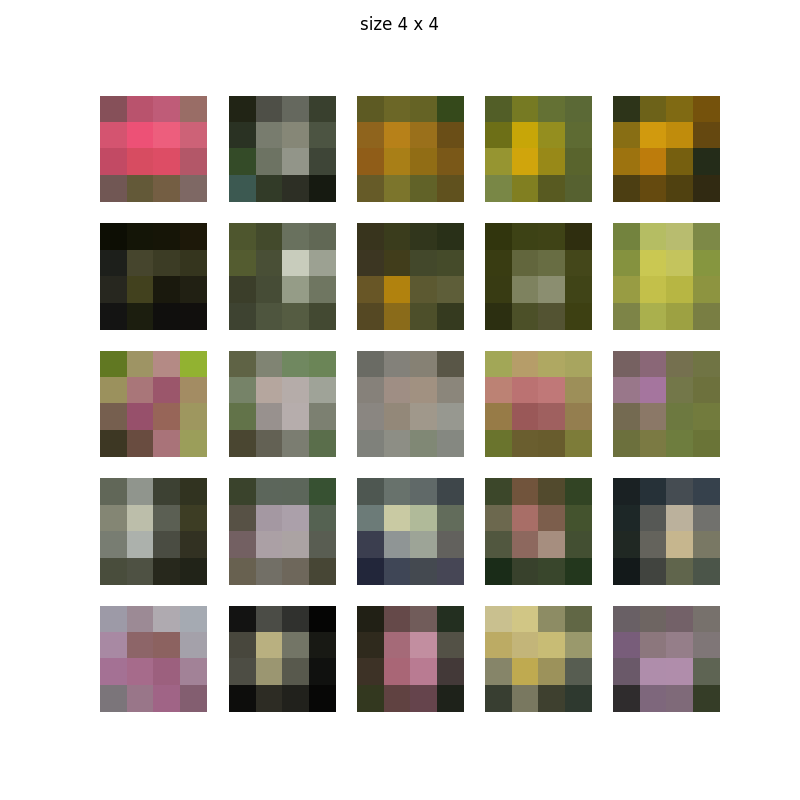

In [42]:
import random 
from torchvision import transforms
from PIL import Image
fig = plt.figure(figsize=(8,8))
images = glob(f'data/flowers-102/jpg/*.jpg')
random.shuffle(images)
@widgets.interact(
            step=widgets.IntSlider(
                min=0, max=8, step=1,
                value=0,
                continuous_update=False,
            ),
            num_rows=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
            num_cols=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
)
def show(num_rows = 10, num_cols = 10, step=0):
    fig.clear()
    fig.suptitle(f'real images')
    image_size = 4*2**(step)
    fig.suptitle(f'size {image_size} x {image_size}')
    resize = transforms.Resize((image_size, image_size))
    for i, img_file in enumerate(images[:num_rows*num_cols]):
        fig.add_subplot(num_rows, num_cols, i+1)
        img = Image.open(img_file)
        plt.imshow(resize(img))
        plt.axis('off')